<a href="https://colab.research.google.com/github/diegoestradaXO/2D-Game-Project/blob/master/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/datasets/NLP/"

en_US.blogs.txt  en_US.news.txt  en_US.twitter.txt


In [3]:
import pandas as pd
import numpy as np
import os
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import reuters
from collections import Counter, defaultdict
import random
import warnings
import copy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Carga de datos y preprocesamiento

In [4]:
fileBlog = open('/content/drive/MyDrive/datasets/NLP/en_US.blogs.txt','r')
fblog = fileBlog.readlines()
blogs = [i.lower() for i in fblog] 
fileBlog.close()

fileNews = open('/content/drive/MyDrive/datasets/NLP/en_US.news.txt','r')
fnews = fileNews.readlines()
news = [i.lower() for i in fnews]
fileNews.close()

fileTwitter = open('/content/drive/MyDrive/datasets/NLP/en_US.twitter.txt','r')
ftwitter = fileTwitter.readlines()
tweets = [i.lower() for i in ftwitter]
fileTwitter.close()


In [5]:
#Eliminar url
blogs = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in blogs]
blogs = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in blogs]

news = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in news]
news = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in news]

tweets = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in tweets]
tweets = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in tweets]

### Se hace la eliminación de caracteres especiales, numeros y emojis
tweets = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in tweets]
news = [re.sub('[^a-zA-Z0-9 ]+', '', i) for i in news]
blogs = [re.sub('[^a-zA-Z0-9 ]+', '', i) for i in blogs]

In [6]:
#Quitar palabras tendencias
stopwords = set(stopwords.words('english'))
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em']
for i in expresiones:
    stopwords.add(i)

clean_tweets = []
for tweet in tweets:
    word_list = []
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    clean_tweets.append(' '.join(word_list))

clean_blogs = []
for blog in blogs:
    word_listo = []
    for word in blog.split():
        if word not in stopwords:
            word_listo.append(word)
    clean_blogs.append(' '.join(word_listo))

clean_news = []
for new in news:
    list_words = []
    for word in new.split():
        if word not in stopwords:
            list_words.append(word)
    clean_news.append(' '.join(list_words))

# Análisis Exploratorio

### Frecuencia en tweets

In [7]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency

,0
thanks gonna dc anytime soon love see way way long,1
meet someone special youll know heart beat rapidly youll smile reason,1
theyve decided fun dont,1
tired played lazer tag ran lot ughh going sleep 5 minutes,1
words complete stranger made birthday even better,1
...,...
u didnt give,1
whats good see success got poppin yo area,1
consumers visual want data finger tips mobile way deliver 247,1
rhonj time,1


### Frecuencia en noticias

In [8]:
frec_dic_news = {}
for word in clean_news:
    if word in frec_dic_news:
        frec_dic_news[word] += 1
    else:
        frec_dic_news[word] = 1

news_frecuency = pd.DataFrame.from_dict(frec_dic_news, orient='index')
news_frecuency

,0
wasnt home alone apparently,1
st louis plant close would die old age workers making cars since onset mass automotive production 1920s,1
wsus plans quickly became hot topic local online sites though people applauded plans new biomedical center many deplored potential loss building,1
alaimo group mount holly contract last fall evaluate suggest improvements trenton water works campaign finance records released week show two employees donated total 4500 political action committee pac partners progress early june partners progress reported gave 10000 direct inkind contributions mayor tony mack two weeks leading victory mayoral runoff election june 15,1
often difficult predict laws impact legislators think twice carrying bill absolutely necessary issue serious enough merit attention definitely make situation worse,1
...,...
serve taste spring chop fresh vegetables olives cheeses grilled chicken set selection salad dressings let guests assemble chopped salads numbered jars hold dressings style 5 anthropologie see anthropologiecom stores,1
complaint alleges kuvan adil piromari 42 us driving school el cajon served gobetween applicants state employees one answered phone office,1
mood six months chill ice crystals northeast ohio ground soft fragrant seemingly overnight things growing tropics producing fruit earth sweet corn mightily fragrant herbs deep green tender broccoli,1
starts sunday chivas goats arent great team beat one 10 win salt lake rio tinto also one player rival roger espinoza best guy mls one talks doesnt play new york la pacific northwest goalkeeper dan kennedy tough points,1


### Frecuencia en blogs

In [9]:
frec_dic_blogs = {}
for word in blogs:
    if word in frec_dic_blogs:
        frec_dic_blogs[word] += 1
    else:
        frec_dic_blogs[word] = 1

blogs_frecuency = pd.DataFrame.from_dict(frec_dic_blogs, orient='index')
blogs_frecuency

,0
in the years thereafter most of the oil fields and platforms were named after pagan gods,1
we love you mr brown,1
chad has been awesome with the kids and holding down the fort while i work later than usual the kids have been busy together playing skylander on the xbox together after kyan cashed in his from his piggy bank he wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it he never taps into that thing either that is how we know he wanted it so bad we made him count all of his money to make sure that he had enough it was very cute to watch his reaction when he realized he did he also does a very good job of letting lola feel like she is playing too by letting her switch out the characters she loves it almost as much as him,1
so anyways i am going to share some home decor inspiration that i have been storing in my folder on the puter i have all these amazing images stored away ready to come to life when we get our home,1
with graduation season right around the corner nancy has whipped up a fun set to help you out with not only your graduation cards and gifts but any occasion that brings on a change in ones life i stamped the images in memento tuxedo black and cut them out with circle nestabilities i embossed the kraft and red cardstock with tes new stars impressions plate which is double sided and gives you 2 fantastic patterns you can see how to use the impressions plates in this tutorial taylor created just one pass through your die cut machine using the embossing pad kit is all you need to do super easy,1
...,...
the hulking mass of unfinished brick and concrete at 2013 35th st is so unsightly it became a poster child for zoning reform,1
the 2004 iifa award ceremony witnessed a contingent of over 450 stars celebrities cricketers industrialists and government leaders over the festive weekend,1
plus i have also been allowing myself not to get stressed over things that have not been done if the ironing is not done right now its not the end of the world if that phone call is made tomorrow rather than today then thats ok too living in the moment and allowing myself the time to get back to feeling great,1
5 whats the barrier to entry and why is the business sustainable,1


## Frecuencia en palabras

In [10]:
news_count = Counter()

for title in clean_news:
    news_count.update(word.strip('.,?!"\'').lower() for word in title.split())

In [11]:
blog_count = Counter()
for blog in clean_blogs:
    blog_count.update(word.strip('.,?!"\'').lower() for word in blog.split())

In [12]:
tweet_count = Counter()

for tweet in clean_tweets:
    tweet_count.update(word.strip('.,?!"\'').lower() for word in tweet.split())

Palabras con mayor presencia

In [13]:
tweet_count.most_common(10)

[('love', 105459),
 ('good', 99641),
 ('dont', 90063),
 ('thanks', 88611),
 ('day', 88571),
 ('one', 81297),
 ('know', 79207),
 ('u', 75913),
 ('great', 75349),
 ('time', 74623)]

In [14]:
blog_count.most_common(10)

[('one', 124321),
 ('time', 88110),
 ('would', 81663),
 ('know', 59932),
 ('people', 59217),
 ('dont', 56252),
 ('also', 55255),
 ('new', 54335),
 ('us', 53583),
 ('even', 51743)]

In [15]:
news_count.most_common(10)

[('said', 250347),
 ('one', 83167),
 ('would', 71595),
 ('new', 70301),
 ('also', 58756),
 ('two', 57340),
 ('year', 54764),
 ('first', 52628),
 ('years', 51527),
 ('last', 51521)]

### Nube de palabras

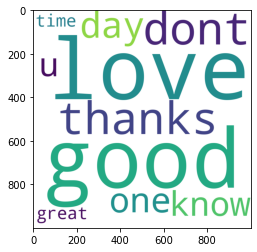

In [16]:
cloud_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tweet_count)
plt.imshow(cloud_tweet)

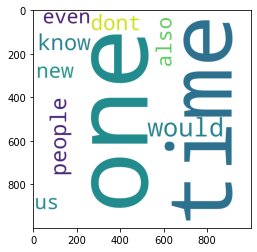

In [17]:
cloud_blog = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(blog_count)
plt.imshow(cloud_blog)

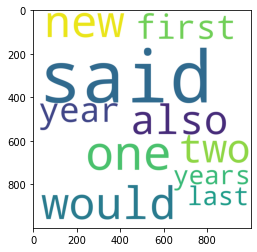

In [18]:
cloud_news = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(news_count)
plt.imshow(cloud_news)

### Gráficas de barras

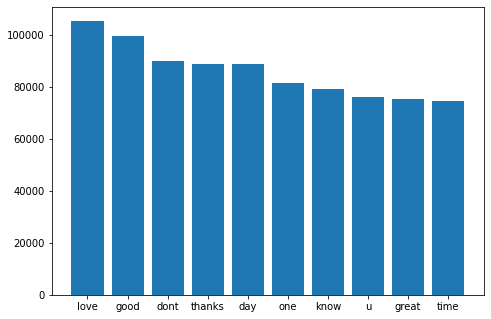

In [19]:
datos_tweet = tweet_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

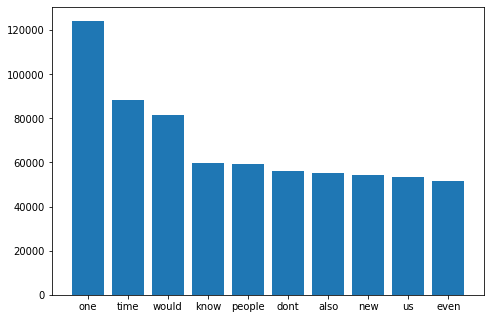

In [20]:
datos_blog = blog_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_blog]
y_axis = [i[1] for i in datos_blog]
ax.bar(x_axis,y_axis)
plt.show()

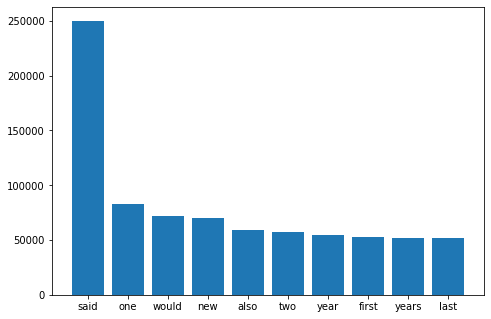

In [21]:
datos_news = news_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_news]
y_axis = [i[1] for i in datos_news]
ax.bar(x_axis,y_axis)
plt.show()

## N-Gramas

In [22]:
global_data = clean_tweets+clean_news+clean_blogs

In [23]:
val=round(len(global_data)*0.1,0)
random_sample=random.sample(global_data,int(val))

### 2-Grama

In [24]:
warnings.filterwarnings('ignore')

In [30]:
digrama=[]
print(digrama)
size=2
def ngram(ngrama, size):
  for word in range(len(random_sample)):
    try:
      for item in ngrams(random_sample[word].split(),size):
          ngrama.append(item)
    except:
        return

ngram(digrama, size)
print(digrama)

[]
[('dont', 'expect'), ('expect', 'make'), ('make', 'million'), ('million', 'added'), ('added', 'araceli'), ('araceli', 'restaurant'), ('restaurant', 'server'), ('server', 'dollar'), ('dollar', 'pocket'), ('pocket', 'thank'), ('thank', 'god'), ('knights', 'aim'), ('aim', 'improvement'), ('youre', 'best'), ('best', 'dude'), ('dude', 'podcasting'), ('podcasting', 'movies'), ('movies', 'know'), ('continued', 'pachyderm'), ('pachyderm', 'project'), ('project', 'ipad'), ('ipad', 'app'), ('app', 'generated'), ('bills', 'recently'), ('recently', 'introduced'), ('introduced', 'us'), ('us', 'house'), ('house', 'senate'), ('senate', 'new'), ('new', 'jersey'), ('jersey', 'lawmakers'), ('lawmakers', 'aim'), ('aim', 'close'), ('close', 'loopholes'), ('loopholes', 'natural'), ('natural', 'gas'), ('gas', 'drillers'), ('drillers', 'written'), ('written', 'federal'), ('federal', 'environmental'), ('environmental', 'regulations'), ('elisett', 'torres'), ('torres', '51'), ('51', 'kissimmee'), ('kissimme

In [31]:
trigrama=[]
print(trigrama)
size=3
ngram(trigrama, size)
print(trigrama)

[]
[('dont', 'expect', 'make'), ('expect', 'make', 'million'), ('make', 'million', 'added'), ('million', 'added', 'araceli'), ('added', 'araceli', 'restaurant'), ('araceli', 'restaurant', 'server'), ('restaurant', 'server', 'dollar'), ('server', 'dollar', 'pocket'), ('dollar', 'pocket', 'thank'), ('pocket', 'thank', 'god'), ('knights', 'aim', 'improvement'), ('youre', 'best', 'dude'), ('best', 'dude', 'podcasting'), ('dude', 'podcasting', 'movies'), ('podcasting', 'movies', 'know'), ('continued', 'pachyderm', 'project'), ('pachyderm', 'project', 'ipad'), ('project', 'ipad', 'app'), ('ipad', 'app', 'generated'), ('bills', 'recently', 'introduced'), ('recently', 'introduced', 'us'), ('introduced', 'us', 'house'), ('us', 'house', 'senate'), ('house', 'senate', 'new'), ('senate', 'new', 'jersey'), ('new', 'jersey', 'lawmakers'), ('jersey', 'lawmakers', 'aim'), ('lawmakers', 'aim', 'close'), ('aim', 'close', 'loopholes'), ('close', 'loopholes', 'natural'), ('loopholes', 'natural', 'gas'), (

### K-Nearest Neighbor Probability Model

In [32]:
model = defaultdict(lambda: defaultdict(lambda: 0))
for i,j,k in trigrama:
    model[(i,j)][k] +=1
for i,j in model:
    total=float(sum(model[(i,j)].values()))
    for k in model[(i,j)]:
        model[(i,j)][k] /= total

### Función de predicción

In [41]:
def prediction(palabra1,palabra2):
  word1 = ""
  word2 = ""
  word3 = ""
  model2 = copy.deepcopy(model)
  for predicciones in range(3):
    palabranueva = ""
    for palabra in model2[(palabra1,palabra2)]:
      currentWord = 0.0
      for possibleValues in model2[(palabra1, palabra2)].keys():
        valor = model2[(palabra1,palabra2)][possibleValues]
        if (valor > currentWord):
          palabranueva = possibleValues
          currentWord = valor
        else:
          pass
    if (word1 == ""):
      word1 = palabranueva
      model2[(palabra1,palabra2)].pop(palabranueva)
    elif (word2 == ""):
      word2 = palabranueva
      model2[(palabra1,palabra2)].pop(palabranueva)
    elif (word3 == ""):
      word3 = palabranueva
      model2[(palabra1,palabra2)].pop(palabranueva)
  return word1, word2, word3

In [47]:
palabra1, palabra2, palabra3 = "","",""
palabra1, palabra2, palabra3 = prediction("hot","dogs")
print("Palabras "+str(palabra1)+','+str(palabra2)+','+str(palabra3))

KeyError: ignored